Mounted at /content/gdrive
Found 4842 images belonging to 150 classes.
Found 1978 images belonging to 150 classes.
Class names of our dataset: ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magik

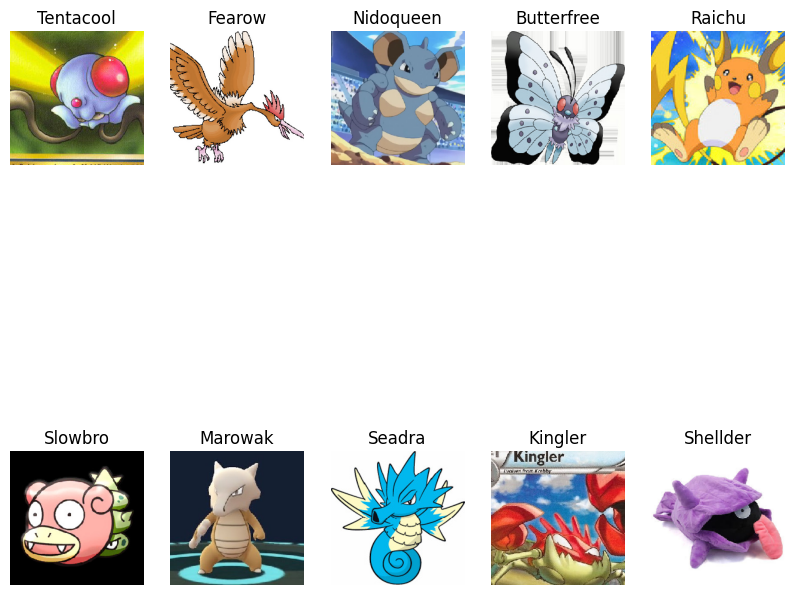

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive

drive.mount('/content/gdrive')

root_dir = "gdrive/My Drive/PokemonData/"

#Define the input paramters of image dataset, create train and test data with a 70/30 split.
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.3
)

#Now take in training and testing data.
#Our dataset is structured in such a way that each folder correspond to the image of pokemon within it.
trainData = datagen.flow_from_directory(
    root_dir,
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

testData = datagen.flow_from_directory(
    root_dir,
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

#Print out dataset qualities
class_indices = trainData.class_indices
class_names = list(class_indices.keys())
numOfClasses = len(class_names)
print("Class names of our dataset:", class_names)
print("Training Size: ", trainData.n)

testClassIndices = testData.class_indices
testClasses = list(testClassIndices.keys())

#Print out 10 images from the training dataset
for images, labels in trainData:
  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(2,5, 1 + i)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    class_name = list(trainData.class_indices.keys())[label_index]
    plt.title(class_name)
    plt.axis('off')
  plt.show()
  break

#Declare model, initialize convulational layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.01)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(numOfClasses, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
model.fit(trainData, epochs=30, validation_data=testData)

y_pred = model.predict(testData)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = testData.classes

accuracy = accuracy_score(y_val_classes, y_pred_classes)
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

model.save('pokemon_indentification.h5')